In [1]:
import pathlib
import dask.dataframe as dd
import psutil
import numpy as np
import pandas as pd

In [2]:
# print amount of available RAM memory
print(f"Available RAM: {psutil.virtual_memory().available / (1024 ** 3):.2f} GB")

Available RAM: 3.98 GB


In [3]:
# using pathlib create directory called meteo
data_raw_path = pathlib.Path("meteo") / "meteo_dask.h5"
data_raw_path.exists()

True

In [4]:
df = dd.read_hdf(data_raw_path, key='df')

In [5]:
df.head()

,Date,Time,TempOut,TempHi,TempLow,HumOut,DewPt,WindSpeed,WindDir,WindRun,...,CoolDD,TempIn,HumIn,DewPtIn,HeatIn,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,24-12-29,0:30,0.4,0.4,0.3,98,0.1,0.0,NE,0.0,...,0.0,18.4,30,0.5,16.4,0.0,699.0,1.0,100.0,30.0
1,24-12-29,1:00,0.1,0.3,-0.1,98,-0.2,0.0,NE,0.0,...,0.0,18.4,30,0.5,16.4,0.0,699.0,1.0,100.0,30.0
2,24-12-29,1:30,-0.2,-0.1,-0.3,98,-0.5,0.0,NE,0.0,...,0.0,18.3,30,0.4,16.4,0.0,699.0,1.0,100.0,30.0
3,24-12-29,2:00,-0.3,-0.3,-0.4,98,-0.6,0.0,NE,0.0,...,0.0,18.3,30,0.4,16.3,0.0,700.0,1.0,100.0,30.0
4,24-12-29,2:30,-0.5,-0.4,-0.6,98,-0.8,0.0,NE,0.0,...,0.0,18.3,30,0.4,16.3,0.0,701.0,1.0,100.0,30.0


In [6]:
df.dtypes

Date           string[pyarrow]
Time           string[pyarrow]
TempOut                float64
TempHi                 float64
TempLow                float64
HumOut                   int64
DewPt                  float64
WindSpeed              float64
WindDir        string[pyarrow]
WindRun                float64
WindSpeedHi            float64
WindDirHi      string[pyarrow]
WindChill              float64
HeatIndex              float64
THWIndex               float64
THSWIndex              float64
Bar                    float64
Rain                   float64
RainRate               float64
SolarRad                 int64
SolarEnergy            float64
SolarRadHi               int64
UVIndex                float64
UVDose                 float64
UVIndexHi              float64
HeatDD                 float64
CoolDD                 float64
TempIn                 float64
HumIn                    int64
DewPtIn                float64
HeatIn                 float64
ET                     float64
WindSamp

In [7]:
len(df)

14108

In [8]:
df[df.HumOut > 0].TempOut.mean()

<dask_expr.expr.Scalar: expr=((Filter(frame=ArrowStringConversion(frame=FromMapProjectable(b391f08)), predicate=ArrowStringConversion(frame=FromMapProjectable(b391f08))['HumOut'] > 0))['TempOut']).mean(), dtype=float64>

In [9]:
df[df.HumOut > 0].TempOut.mean().compute()

np.float64(12.60372155667399)

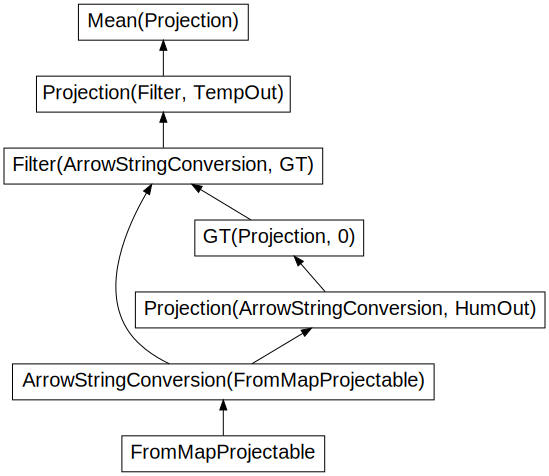

In [10]:
df[df.HumOut > 0].TempOut.mean().visualize(engine='cytoscape')

In [11]:
df.TempOut.groupby(df.HumOut).mean().compute()

HumOut
-1            NaN
 23     20.900000
 24     20.550000
 25     20.233333
 26     19.750000
          ...    
 96      6.416082
 97      8.088943
 98      8.309697
 99      9.622543
 100    15.148000
Name: TempOut, Length: 78, dtype: float64

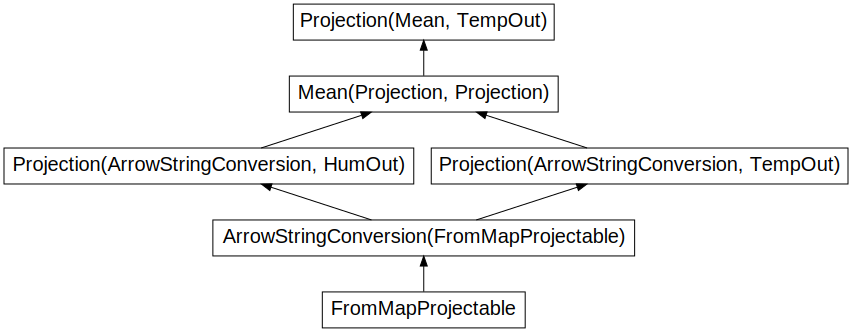

In [12]:
df.TempOut.groupby(df.HumOut).mean().visualize(engine='cytoscape')